# Mall Customers Analysis — Steps (1) Data dfing & (2) Scaling and Visual Exploration

1. **Data dfing**
   - Drop empty rows  
   - Remove duplicates  
   - Convert numeric-like columns to numeric  
   - Fill missing values (median/mode)  
   - Save dfed CSV

2. **Scaling & Visual Exploration**
   - Standardize numerical features (Income, Spending Score)
   - Visualize groupings with scatter plots and PCA (2D projection)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:

try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive mode
    BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR, "data", "Mall_Customers.csv")
df = pd.read_csv(file_path)


In [3]:
df.head(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.isnull().sum()


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [17]:
df.dropna(how="all", inplace=True)


In [18]:
numeric_cols = []
for c in df.columns:
    if df[c].dtype in [np.int64, np.float64] or any(k in c.lower() for k in ['income','spending','age']):
        df[c] = pd.to_numeric(df[c], errors='coerce')
        numeric_cols.append(c)

# Fill numeric NAs with median
for c in numeric_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)

# Fill categorical NAs with mode
cat_cols = [c for c in df.columns if c not in numeric_cols]
for c in cat_cols:
    if df[c].isna().sum() > 0:
        df[c].fillna(df[c].mode().iloc[0], inplace=True)


In [ ]:
dfed_file_path = os.path.join(BASE_DIR, "data", "Mall_Customers_dfed.csv")
df.to_csv(dfed_file_path, index=False)

# Scaling & Visual Exploration

In [20]:
from sklearn.preprocessing import StandardScaler

income_col = [c for c in df.columns if 'income' in c.lower()][0]
spending_col = [c for c in df.columns if 'spending' in c.lower() or 'score' in c.lower()][0]

X = df[[income_col, spending_col]]
print(f"Selected features: {income_col}, {spending_col}")
print(X.describe())

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Selected features: Annual Income (k$), Spending Score (1-100)
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


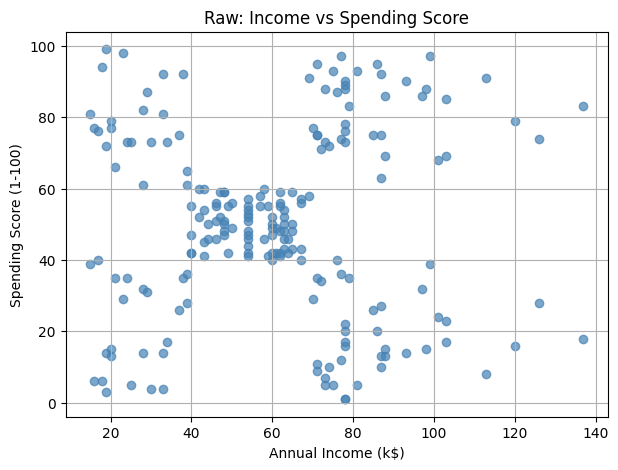

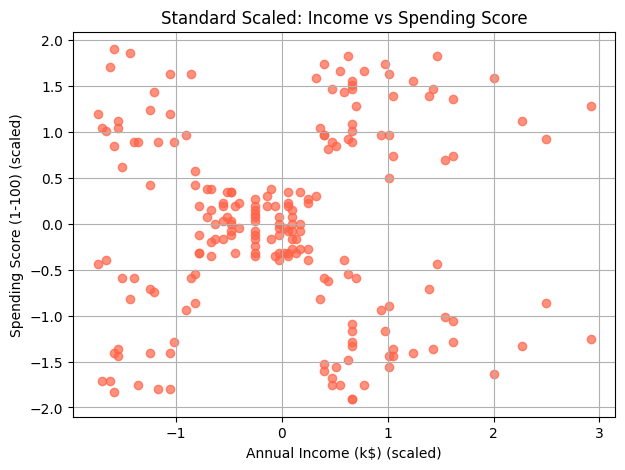

In [21]:
# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1️⃣ Raw scatter plot
plt.figure(figsize=(7,5))
plt.scatter(X[income_col], X[spending_col], c='steelblue', alpha=0.7)
plt.xlabel(income_col)
plt.ylabel(spending_col)
plt.title("Raw: Income vs Spending Score")
plt.grid(True)
plt.show()

# 2️⃣ Scaled scatter plot
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='tomato', alpha=0.7)
plt.xlabel(f"{income_col} (scaled)")
plt.ylabel(f"{spending_col} (scaled)")
plt.title("Standard Scaled: Income vs Spending Score")
plt.grid(True)
plt.show()